In [17]:
import pynwb
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt


### Define behavioral classes to represent track

In [5]:
class BehavioralPoint():
    def __init__(self, center_point, name):
        self.x = center_point[0]
        self.y = center_point[1]
        self.name = name
    
class BehavioralPath():
    def __init__(self, segment, name):
        self.segment = segment
        self.name = name

class BehavioralArea():
    def __init__(self, polygon, name):
        self.polygon = polygon
        self.name = name


### Make behavioral objects for W-track

In [103]:
# W-track path segments
wtrack_L = BehavioralPath([(1.6, 2.25), (1.6, 0.65)], "L")
wtrack_LC = BehavioralPath([(1.6, 0.65), (1.9, 0.65)], "LC")
wtrack_C = BehavioralPath([(1.9, 0.65), (1.9, 2.25)], "C")
wtrack_RC = BehavioralPath([(1.9, 0.65), (2.25, 0.65)], "RC")
wtrack_R = BehavioralPath([(2.25, 0.65), (2.25, 2.25)], "R")

# W-track points (wells)
wtrack_wL = BehavioralPoint((1.6, 2.25), "LW")
wtrack_wC = BehavioralPoint((1.9, 2.25), "CW")
wtrack_wR = BehavioralPoint((2.25, 2.25), "RW")

### Build graph for W-track

In [104]:
G = nx.Graph(name='w-track')

# Add nodes to the graph
# ----------------------
# Track segments
G.add_node(wtrack_L, name=wtrack_L.name, kind='path')
G.add_node(wtrack_LC, name=wtrack_LC.name, kind='path')
G.add_node(wtrack_C, name=wtrack_C.name, kind='path')
G.add_node(wtrack_RC, name=wtrack_RC.name, kind='path')
G.add_node(wtrack_R, name=wtrack_R.name, kind='path')
# Wells
G.add_node(wtrack_wL, name=wtrack_wL.name, kind='point')
G.add_node(wtrack_wC, name=wtrack_wC.name, kind='point')
G.add_node(wtrack_wR, name=wtrack_wR.name, kind='point')

# Add edges connecting the appropriate nodes
# -----------------------------------------
# Segment <-> Segment
G.add_edge(wtrack_L, wtrack_LC)
G.add_edge(wtrack_LC, wtrack_C)
G.add_edge(wtrack_RC, wtrack_C)
G.add_edge(wtrack_LC, wtrack_RC)
G.add_edge(wtrack_RC, wtrack_R)
# Segment <-> Well
G.add_edge(wtrack_L, wtrack_wL)
G.add_edge(wtrack_C, wtrack_wC)
G.add_edge(wtrack_R, wtrack_wR)

### Plot track topology

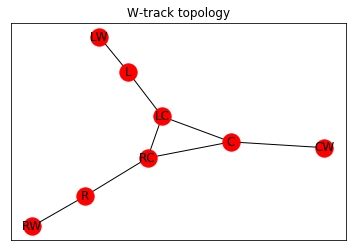

In [105]:
ax = plt.subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.title("W-track topology")
nx.draw_networkx(G, labels=dict(G.nodes.data('name')), fontsize=6)


### Plot track geometry

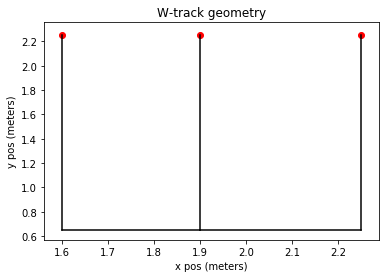

In [114]:
ax = plt.subplot(111)
plt.title('W-track geometry')
for n, attrs in list(G.nodes.data()):
    if attrs['kind']=='point':
        plt.scatter([n.x], [n.y], color='r')
    if attrs['kind']=='path':
        start = n.segment[0]
        end = n.segment[1]
        plt.plot([start[0], end[0]], [start[1], end[1]], color='k')
plt.xlabel('x pos (meters)')
plt.ylabel('y pos (meters)')